<a href="https://colab.research.google.com/github/ashwatisajit/EDA/blob/main/EDA_Digital_Assignment_1_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: ASHWATI N ALAKKAL SAJIT | REG NO: 21BDS0140**

In [66]:
#Link to Github
#https://github.com/ashwatisajit
#Link to the Colab
#https://colab.research.google.com/github/ashwatisajit/EDA/blob/main/EDA_Digital_Assignment_1_Supermarket_Sales.ipynb

In [67]:
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv'
data = pd.read_csv(url)

In [68]:
# Display the first few rows of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [69]:
# Display the last few rows of the dataset
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [70]:
# Display the data types of each column in the DataFrame
data_types = data.dtypes
data_types

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [71]:
# Display the shape of the DataFrame
data_shape = data.shape
print(data_shape)

(1000, 17)


In [72]:
# Calculate the mean of the "Rating" column using numpy's mean function
data_mean = np.mean(data["Rating"])
# Another method to calculate the mean is by using pandas' built-in mean function for a column
# data_mean = data["Rating"].mean()
print(f"Mean of the Ratings from the dataset: {data_mean:.2f}")

Mean of the Ratings from the dataset: 6.97


In [73]:
data_1 = data.copy()

# Calculate the total price without tax by multiplying the unit price by the quantity
data_1['TotalPriceWithoutTax'] = data_1['Unit price'] * data_1['Quantity']

# Calculate the tax amount, which is 5% of the total price without tax
data_1['TaxAmount'] = data_1['TotalPriceWithoutTax'] * 0.05  # Assuming a 5% tax rate

# Calculate the net total by adding the tax amount to the total price without tax
data_1['NetTotal'] = data_1['TotalPriceWithoutTax'] + data_1['TaxAmount']

# Convert the 'Customer type' column to numeric values: 1 for 'Member' and 0 for 'Normal'
data_1['CustomerTypeNumeric'] = data_1['Customer type'].map({'Member': 1, 'Normal': 0})

# Extract the hour from the 'Time' column to analyze purchase patterns by the time of day
data_1['PurchaseHour'] = pd.to_datetime(data_1['Time']).dt.hour

# Calculate the gross income percentage relative to the total price (for profitability analysis)
data_1['GrossIncomePercentage'] = (data_1['gross income'] / data_1['Total']) * 100

# Categorize customer ratings into three categories: 'Poor', 'Average', and 'Good' based on the rating scale
bins = [0, 4, 7, 10]  # Define the bins for rating intervals (1-3: Poor, 4-6: Average, 7-10: Good)
labels = ['Poor', 'Average', 'Good']  # Labels corresponding to the bins
data_1['RatingCategory'] = pd.cut(data_1['Rating'], bins=bins, labels=labels)  # Categorize ratings using the defined bins

data_1.head()

<ipython-input-73-06bb1acfcd7e>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1['PurchaseHour'] = pd.to_datetime(data_1['Time']).dt.hour


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,TotalPriceWithoutTax,TaxAmount,NetTotal,CustomerTypeNumeric,PurchaseHour,GrossIncomePercentage,RatingCategory
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,522.83,26.1415,548.9715,1.0,13,4.761905,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,76.40,3.8200,80.2200,0.0,10,4.761905,Good
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,324.31,16.2155,340.5255,0.0,13,4.761905,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,465.76,23.2880,489.0480,1.0,20,4.761905,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,604.17,30.2085,634.3785,0.0,10,4.761905,Average


In [74]:
# Count the occurrences of each payment method in the 'Payment' column
data['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,310


In [75]:
# Generate descriptive statistics for numerical columns in the dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,9.990000e+02,1000.000000,999.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.973373
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131501e-14,11.708825,1.719309
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


Data Deduplication

In [76]:
# Count the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Handling missing data

In [77]:
# Count the number of missing values (NaN) in each column
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,2
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [78]:
# Count the total number of missing values (NaN) in the dataset
data.isnull().sum().sum()

5

In [79]:
# Count the number of non-missing values in each column
data.count()

,0
Invoice ID,1000
Branch,1000
City,1000
Customer type,1000
Gender,998
Product line,1000
Unit price,1000
Quantity,1000
Tax 5%,1000
Total,1000


Filling missing values

In [80]:
# Fill missing values for categorical data

# Fill missing values in 'Gender' with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Fill missing values in 'Payment' with the mode
data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)


<ipython-input-80-429f6ee81e76>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-80-429f6ee81e76>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [81]:
# Fill missing values for numerical data

# Fill missing values in 'gross margin percentage' with the mean
data['gross margin percentage'].fillna(data['gross margin percentage'].mean(), inplace=True)

# Fill missing values in 'Rating' with the median (more robust against outliers)
data['Rating'].fillna(data['Rating'].median(), inplace=True)


<ipython-input-81-2d6293da8715>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gross margin percentage'].fillna(data['gross margin percentage'].mean(), inplace=True)
<ipython-input-81-2d6293da8715>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [82]:
# Count the total number of missing values (NaN) in the dataset
data.isnull().sum().sum()

0

Outlier detection and filtering

In [83]:
from scipy import stats

# Select only numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a dictionary to hold outliers for each column
outlier_dict = {}

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(data[column]))

    # Identify outliers
    outliers = np.where(z_scores > 3)[0]  # Z-score threshold is set at 3

    # Store the outliers in the dictionary
    outlier_dict[column] = data.iloc[outliers]

for col, outlier_data in outlier_dict.items():
    print(f"Outliers in '{col}' column:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("No outliers detected.")
    print("\n")


Outliers in 'Unit price' column:
No outliers detected.


Outliers in 'Quantity' column:
No outliers detected.


Outliers in 'Tax 5%' column:
No outliers detected.


Outliers in 'Total' column:
No outliers detected.


Outliers in 'cogs' column:
No outliers detected.


Outliers in 'gross margin percentage' column:
      Invoice ID Branch       City Customer type Gender       Product line  \
236  211-30-9270      C  Naypyitaw        Normal   Male  Health and beauty   

     Unit price  Quantity  Tax 5%    Total       Date   Time      Payment  \
236       17.41         5  4.3525  91.4025  1/28/2019  15:16  Credit card   

      cogs  gross margin percentage  gross income  Rating  
236  87.05                 4.761905        4.3525     4.9  


Outliers in 'gross income' column:
No outliers detected.


Outliers in 'Rating' column:
No outliers detected.




Univariate Analysis

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning

In [85]:
# Create a boolean DataFrame where True indicates a '?' value
question_mark_mask = (data == '?')

# Get the columns that contain '?' values
columns_with_question_marks = question_mark_mask.any()

# Extract the names of the columns that have '?' values
columns_with_question_marks_list = columns_with_question_marks[columns_with_question_marks].index.tolist()

# Print the result
if columns_with_question_marks_list:
    print("The following columns contain '?' values:")
    print(columns_with_question_marks_list)
else:
    print("No columns contain '?' values.")


The following columns contain '?' values:
['Customer type', 'Gender']


In [86]:
# Replace '?' with NaN for easier handling of missing values
data.replace('?', np.nan, inplace=True)

# Calculate the mode for 'Customer type' and 'Gender'
customer_type_mode = data['Customer type'].mode()[0]
gender_mode = data['Gender'].mode()[0]

# Replace NaN values with the calculated mode
data['Customer type'].fillna(customer_type_mode, inplace=True)
data['Gender'].fillna(gender_mode, inplace=True)

<ipython-input-86-e64f69564881>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer type'].fillna(customer_type_mode, inplace=True)
<ipython-input-86-e64f69564881>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [87]:
# Create a boolean DataFrame where True indicates a '?' value
question_mark_mask = (data == '?')

# Get the columns that contain '?' values
columns_with_question_marks = question_mark_mask.any()

# Extract the names of the columns that have '?' values
columns_with_question_marks_list = columns_with_question_marks[columns_with_question_marks].index.tolist()

# Print the result
if columns_with_question_marks_list:
    print("The following columns contain '?' values:")
    print(columns_with_question_marks_list)
else:
    print("No columns contain '?' values.")

No columns contain '?' values.


In [88]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.973400
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131409e-14,11.708825,1.718449
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


In [89]:
# List of important numerical variables
vars = ['Unit price', 'Quantity', 'Total', 'Tax 5%', 'gross income', 'Rating']

# Create a dictionary to store the results
statistics = {}

# Calculate mean, median, and mode for each important variable
for var in vars:
    mean_val = data[var].mean()
    median_val = data[var].median()
    mode_val = data[var].mode()[0]  # Get the first mode

    statistics[var] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val
    }

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics).T
print(stats_df)


                    Mean   Median    Mode
Unit price     55.672130   55.230  83.770
Quantity        5.510000    5.000  10.000
Total         322.966749  253.848  87.234
Tax 5%         15.379369   12.088   4.154
gross income   15.379369   12.088   4.154
Rating          6.973400    7.000   6.000


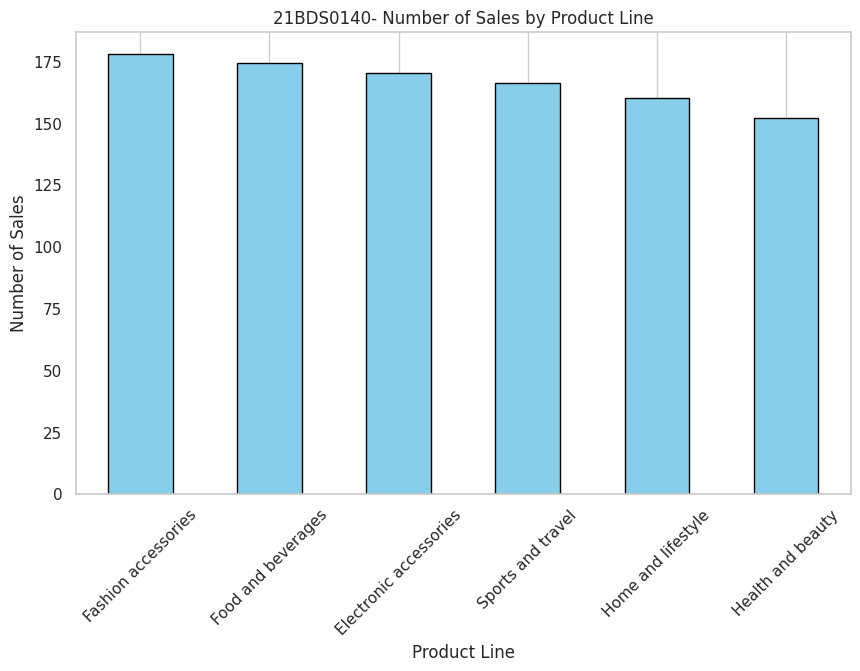

In [90]:
import matplotlib.pyplot as plt

# Count the occurrences of each product line
product_counts = data['Product line'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("21BDS0140- Number of Sales by Product Line")
plt.ylabel('Number of Sales')
plt.xlabel('Product Line')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better visibility
plt.show()


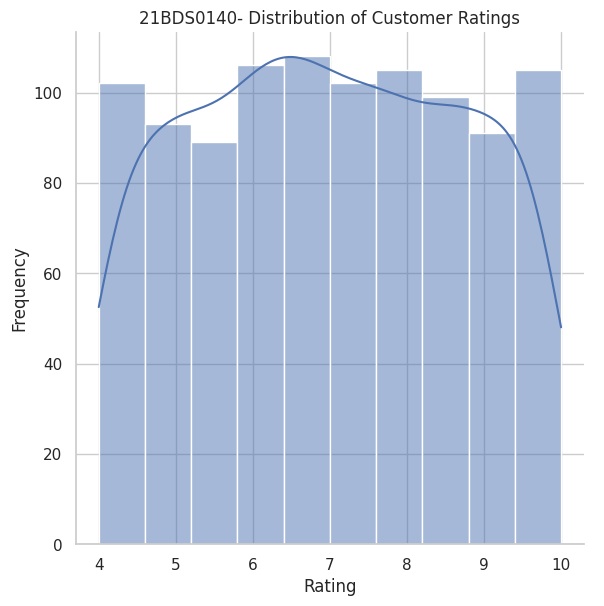

In [91]:
# Create a FacetGrid for the 'Rating' column
sns.set(style="whitegrid")  # Set the style for the plot
g = sns.FacetGrid(data, height=6)  # Create a grid for the distribution plot
g.map(sns.histplot, "Rating", bins=10, kde=True)  # Use histplot with KDE
g.add_legend()

# Add title and labels
plt.title("21BDS0140- Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()


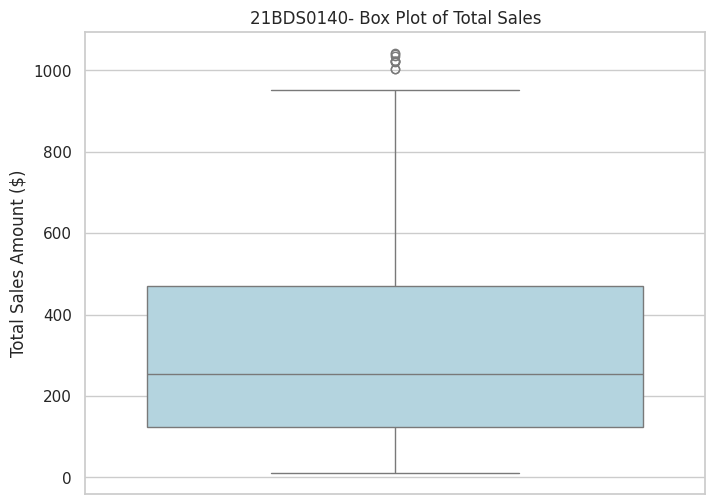

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Total' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Total'], color='lightblue')

# Add title and labels
plt.title("21BDS0140- Box Plot of Total Sales")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()


Bivariate Analysis

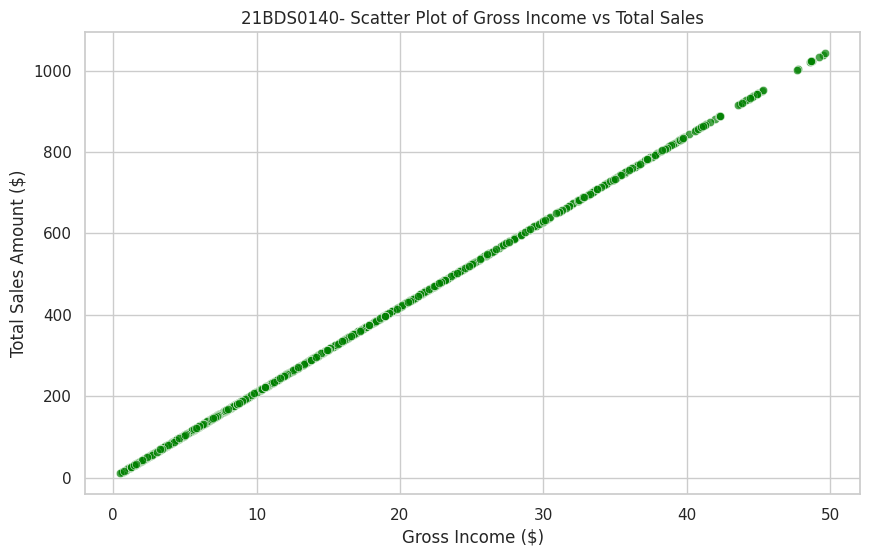

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for 'Gross income' vs 'Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gross income', y='Total', alpha=0.7, color='green')

# Add title and labels
plt.title("21BDS0140- Scatter Plot of Gross Income vs Total Sales")
plt.xlabel("Gross Income ($)")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()



<ipython-input-94-e836177d2e9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Customer type', y='Total', palette='Set2')


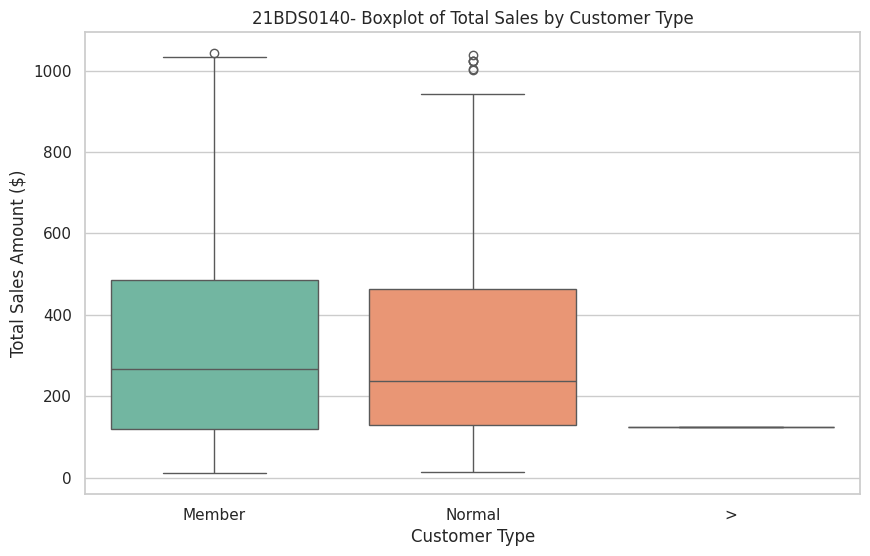

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Total' across different 'Customer type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Customer type', y='Total', palette='Set2')

# Add title and labels
plt.title("21BDS0140- Boxplot of Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()


<ipython-input-95-3da07e6a412c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Total', palette='Set2')


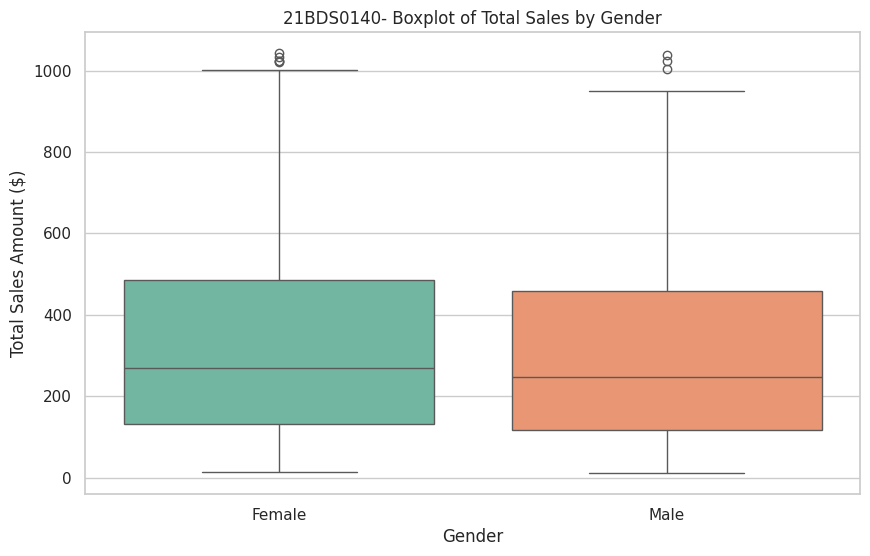

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Total' across different 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Total', palette='Set2')

# Add title and labels
plt.title("21BDS0140- Boxplot of Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()



Multivariate Analysis

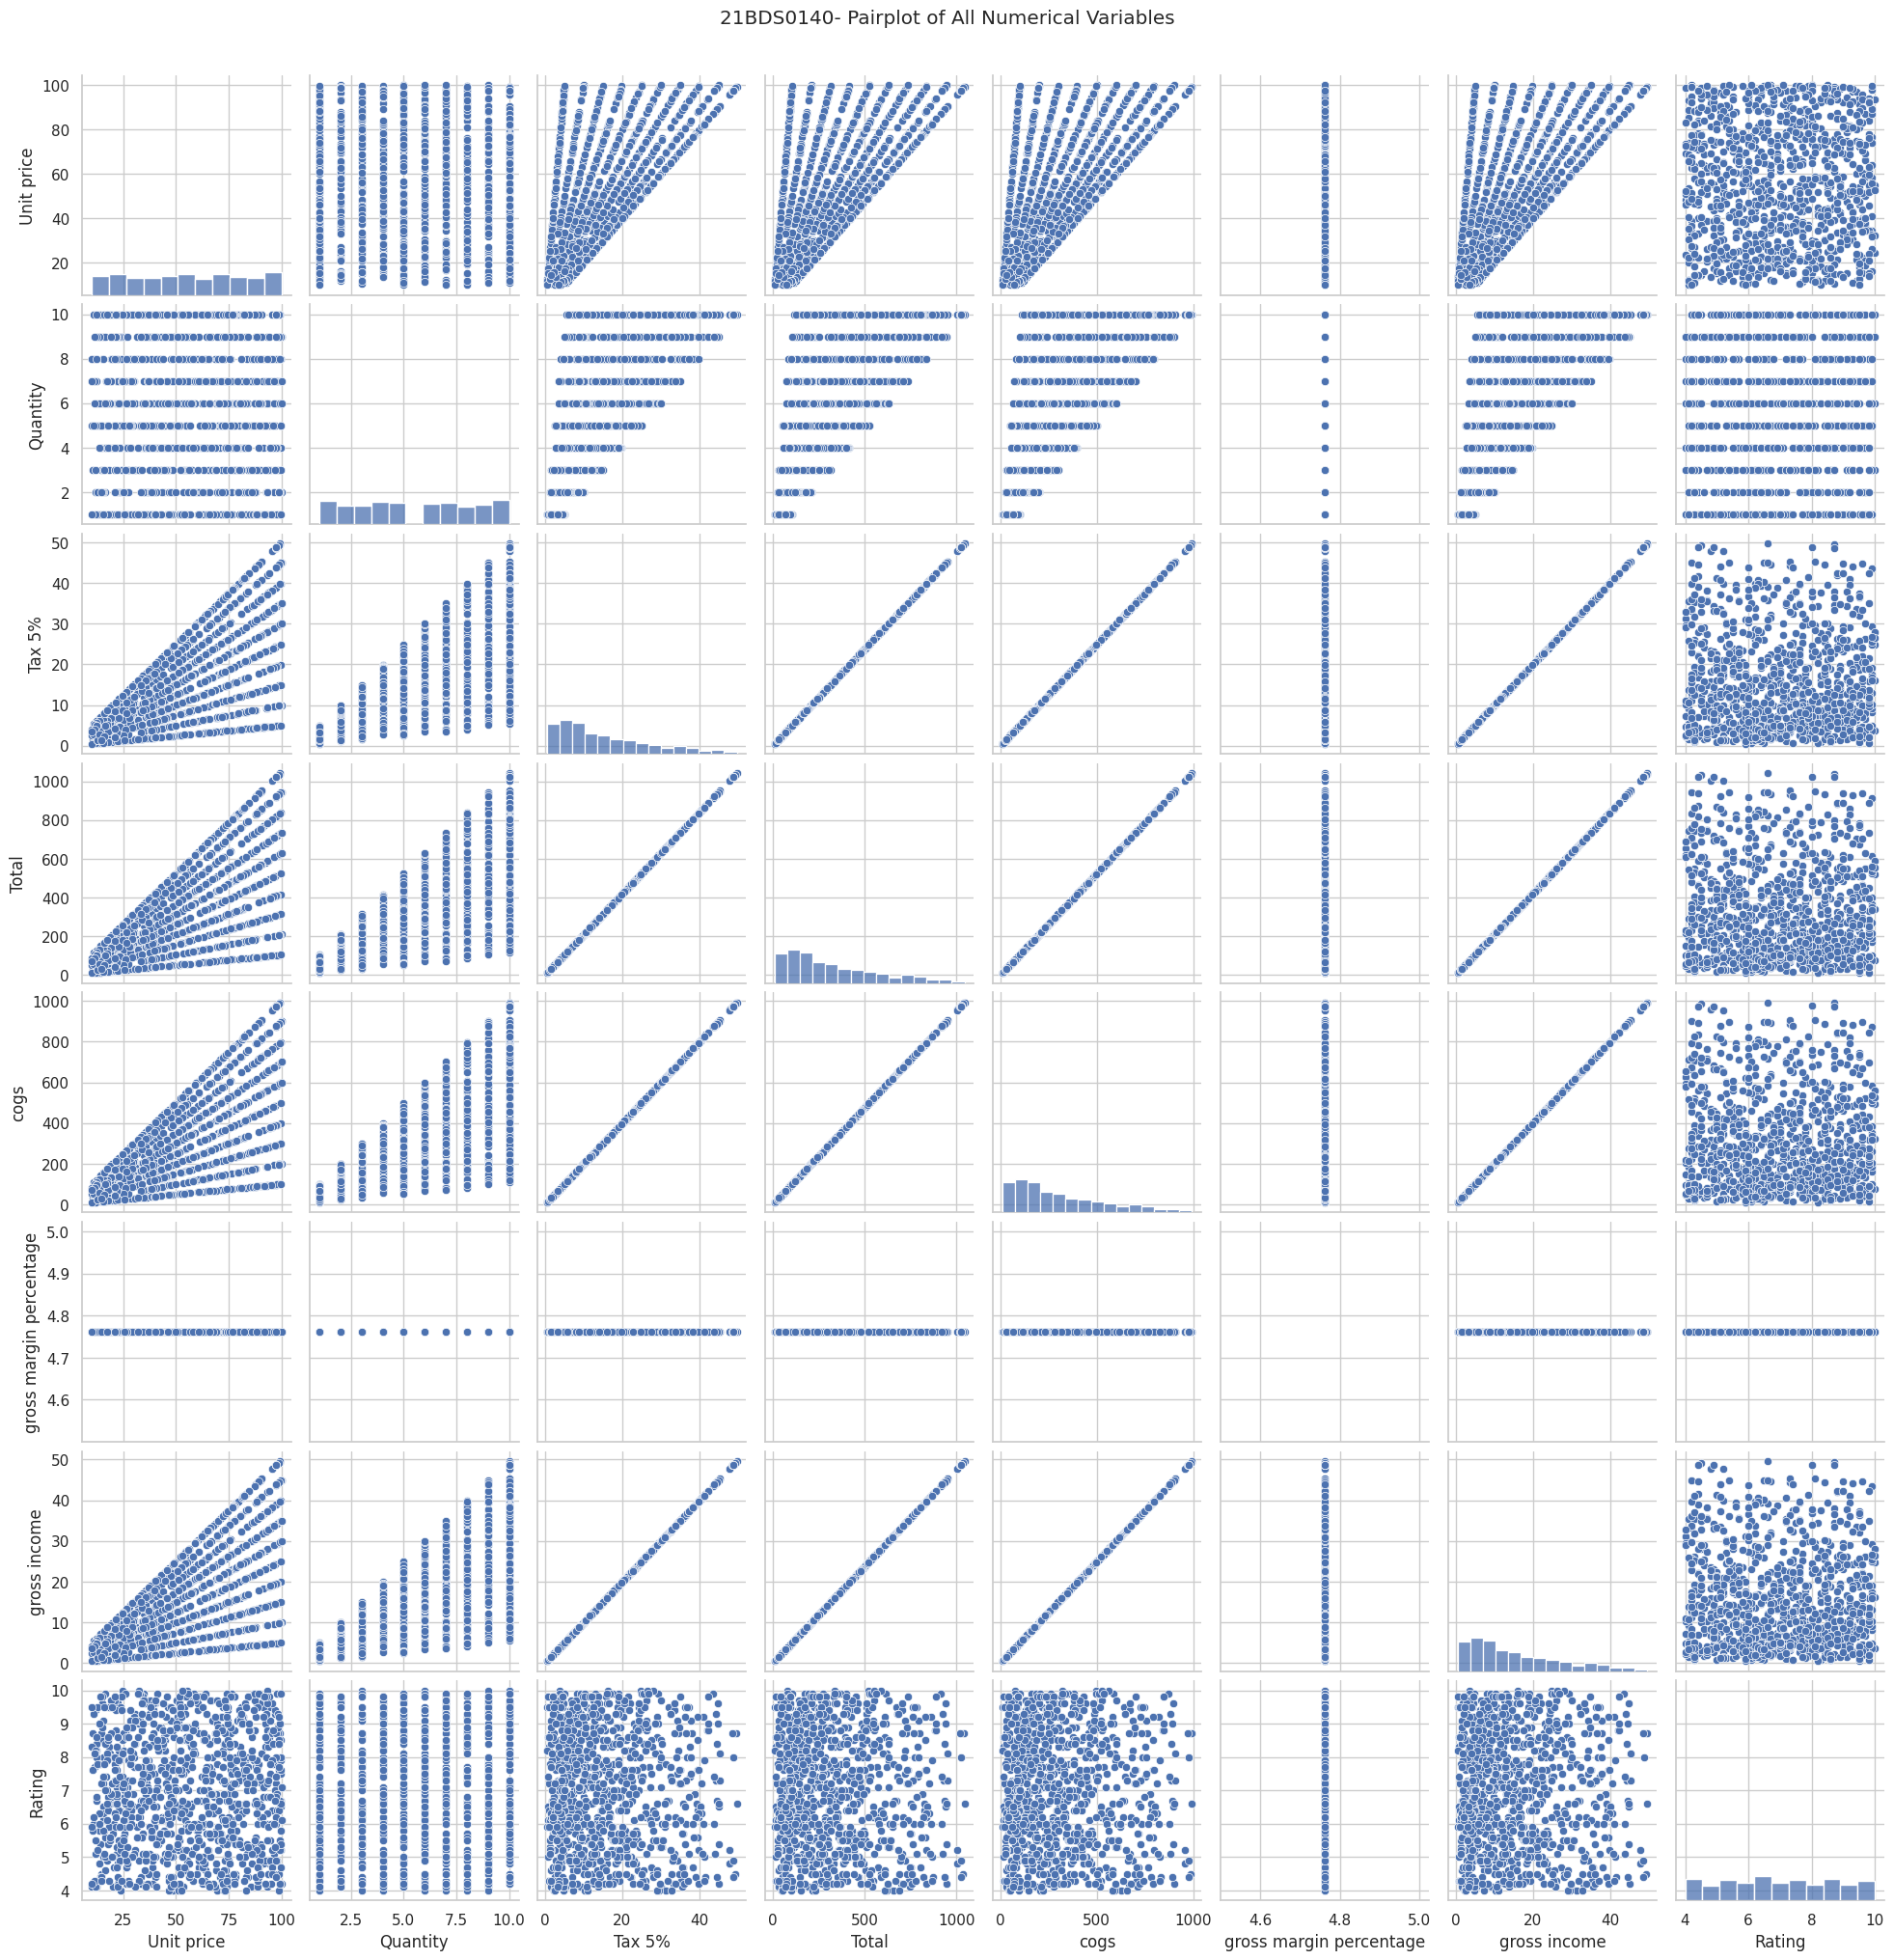

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from the dataset
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a pairplot for all numerical variables
sns.pairplot(data[numerical_columns])

# Show the plot with a title
plt.suptitle("21BDS0140- Pairplot of All Numerical Variables", y=1.02)  # Adjust title position
plt.show()


In [97]:
from scipy import stats

# Replace 'Variable1' and 'Variable2' with the actual column names from your dataset
corr = stats.pearsonr(data['Total'], data['gross income'])  # Example using 'Total' and 'gross income'

print("p-value:\t", corr[1])
print("correlation coefficient:\t", corr[0])


p-value:	 0.0
correlation coefficient:	 0.9999999999999998


In [98]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.047974,0.633962,-0.008632
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.010685,0.705510,-0.016166
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
gross margin percentage,-0.047974,-0.010685,-0.035658,-0.035658,-0.035658,1.000000,-0.035507,-0.038889
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035507,1.000000,-0.036640
Rating,-0.008632,-0.016166,-0.036640,-0.036640,-0.036640,-0.038889,-0.036640,1.000000


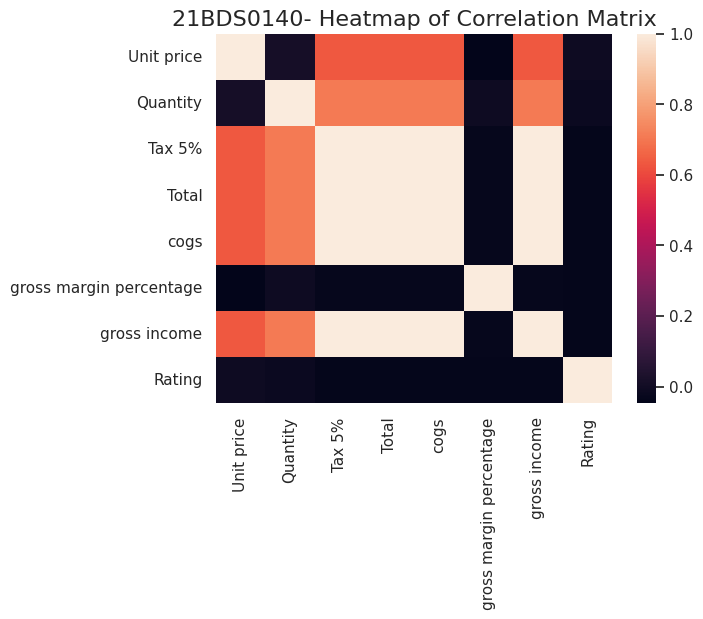

In [99]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title("21BDS0140- Heatmap of Correlation Matrix", fontsize=16)
plt.show()

In [100]:
# Time Series Analysis

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index for time series analysis
data.set_index('Date', inplace=True)

data.index

<ipython-input-100-f19fac8881a6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


DatetimeIndex(['2019-01-05', '2019-03-08', '2019-03-03', '2019-01-27',
               '2019-02-08', '2019-03-25', '2019-02-25', '2019-02-24',
               '2019-01-10', '2019-02-20',
               ...
               '2019-03-22', '2019-01-24', '2019-03-10', '2019-02-22',
               '2019-02-18', '2019-01-29', '2019-03-02', '2019-02-09',
               '2019-02-22', '2019-02-18'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)

In [101]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()

In [102]:
# Daily sales total
daily_sales = data['Total'].resample('D').sum()

# Weekly sales total
weekly_sales = data['Total'].resample('W').sum()

# Monthly sales total
monthly_sales = data['Total'].resample('M').sum()

<ipython-input-102-4e0efd9030e5>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Total'].resample('M').sum()


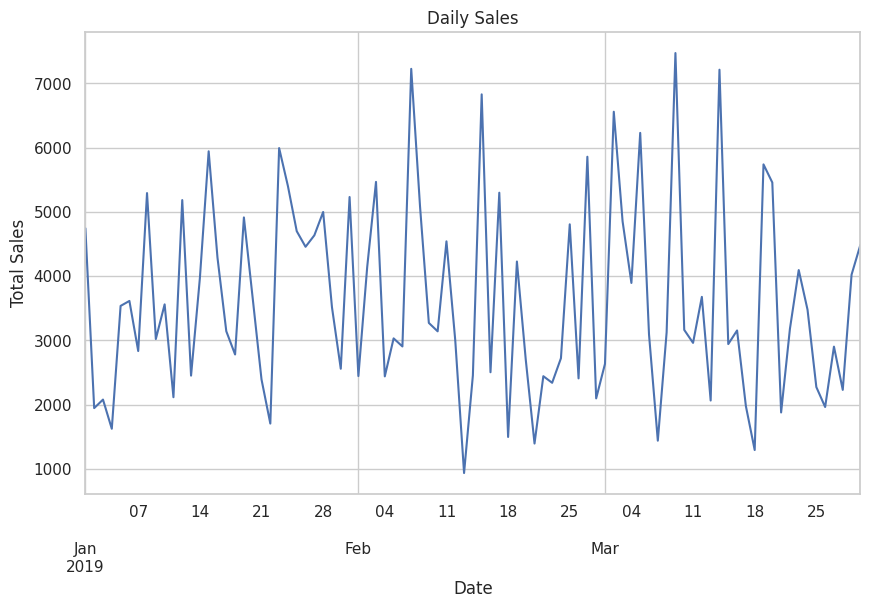

In [103]:
import matplotlib.pyplot as plt

# Plot daily sales
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

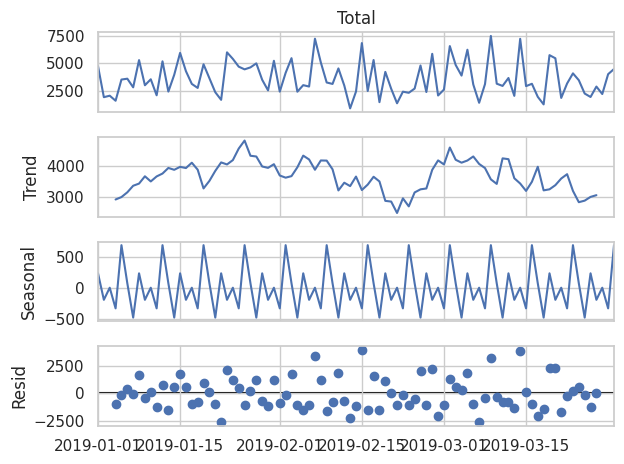

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


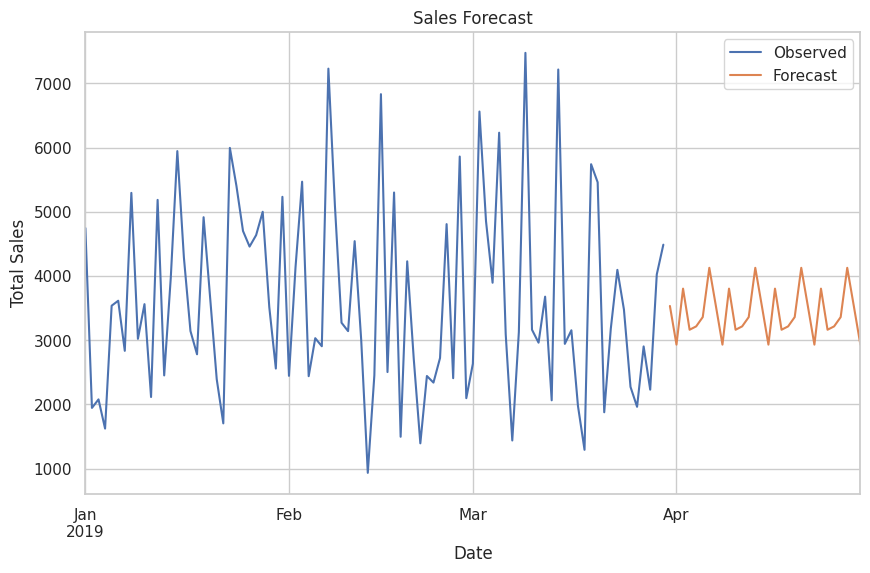

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example using Exponential Smoothing for forecasting
model = ExponentialSmoothing(daily_sales, seasonal='add', seasonal_periods=7)
model_fit = model.fit()
forecast = model_fit.forecast(30)  # Forecast for the next 30 days

# Plot forecast
plt.figure(figsize=(10, 6))
daily_sales.plot(label='Observed')
forecast.plot(label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

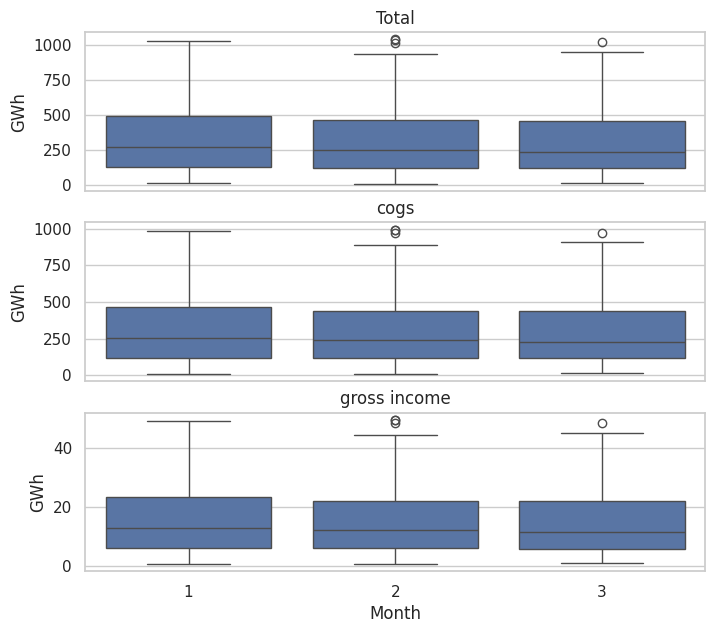

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is in datetime format and extract 'Month'
data['Month'] = data.index.month

# Create box plots for monthly analysis
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Total', 'cogs', 'gross income'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')
plt.show()

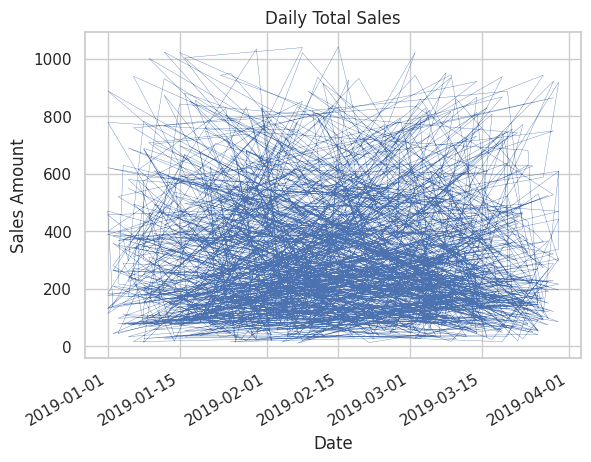

In [107]:
# Plot full time series of daily total sales
data['Total'].plot(linewidth=0.25)
plt.title('Daily Total Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Date')
plt.show()

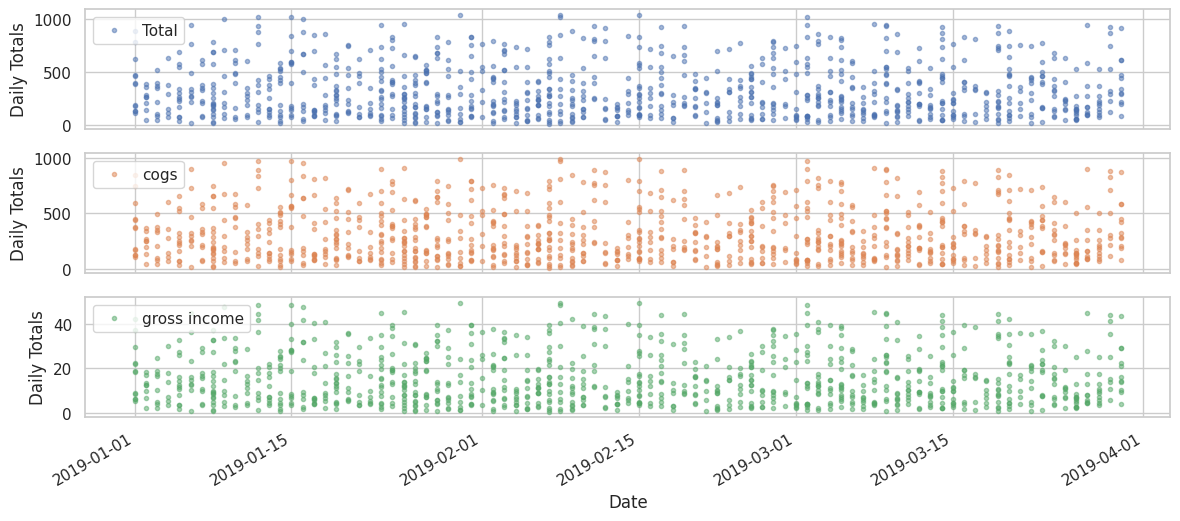

In [108]:
cols_to_plot = ['Total', 'cogs', 'gross income']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
                               linestyle='None', figsize=(14, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')
plt.show()

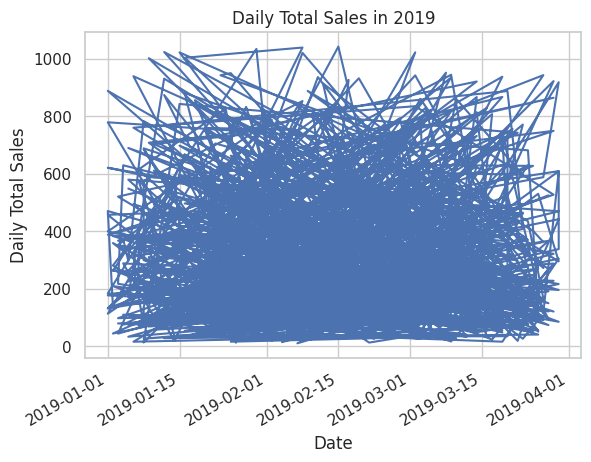

In [109]:
ax = data.loc['2019', 'Total'].plot()
ax.set_ylabel('Daily Total Sales')
plt.title('Daily Total Sales in 2019')
plt.show()

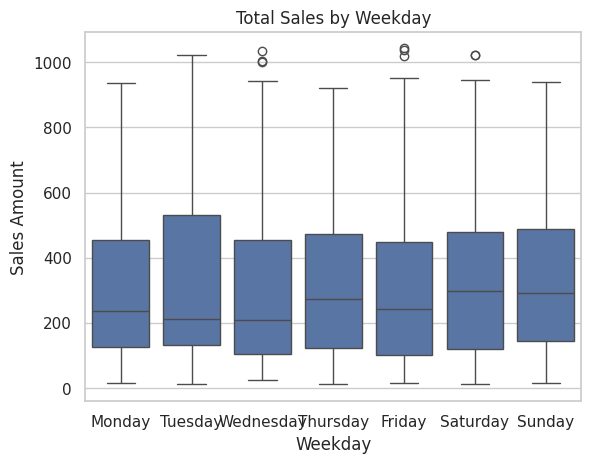

In [110]:
# Specify the correct order of the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot with specified weekday order
sns.boxplot(data=data, x='Weekday Name', y='Total', order=weekday_order)
plt.title('Total Sales by Weekday')
plt.ylabel('Sales Amount')
plt.xlabel('Weekday')
plt.show()

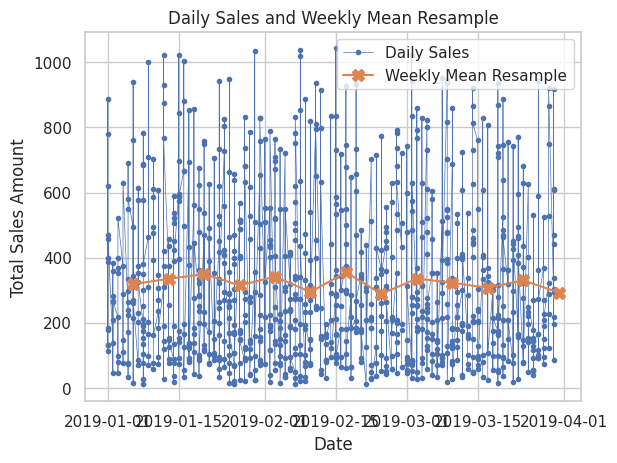

In [111]:
# Sort the Date index to ensure it is in chronological order
data = data.sort_index()

# Define the start and end date for the range you want to visualize
start = '2019-01-01'
end = '2019-12-31'

# Calculate the weekly mean
data_weekly_mean = data['Total'].resample('W').mean()

# Plot the graph
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Total'], marker='.', linestyle='-', linewidth=0.5, label='Daily Sales')
ax.plot(data_weekly_mean.loc[start:end], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Total Sales Amount')
ax.set_xlabel('Date')
ax.legend()
plt.title('Daily Sales and Weekly Mean Resample')
plt.show()

In [112]:
# K-Means Clustering

from sklearn.cluster import KMeans

# Selecting 'Unit price' and 'Total' for clustering
X = data[['Unit price', 'Total']].values

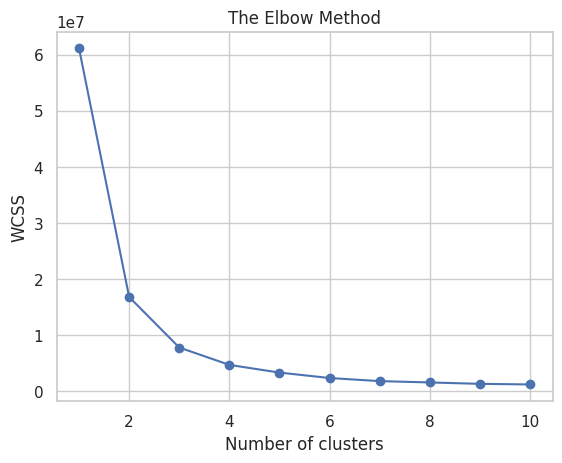

In [113]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph with dots at each point
plt.plot(range(1, 11), wcss, marker='o')  # Add marker='o' to display dots
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

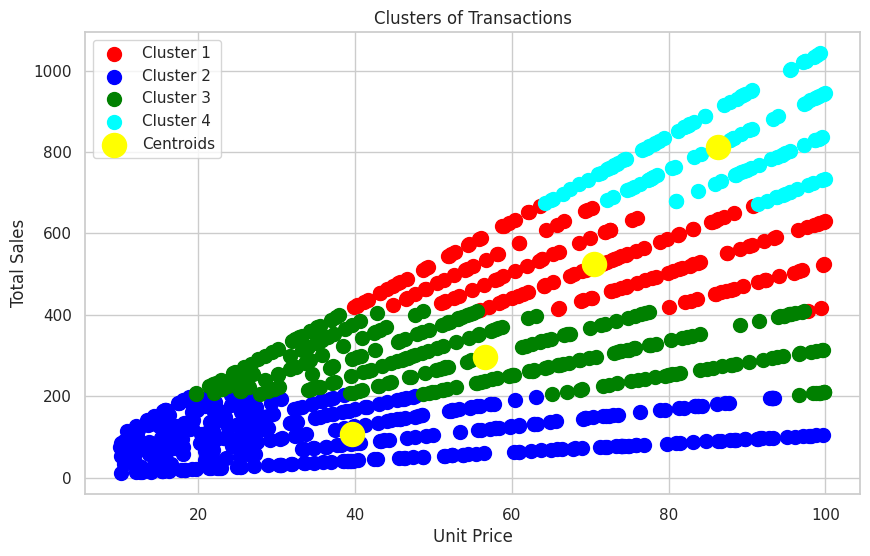

In [115]:
# Visualising the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Transactions')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

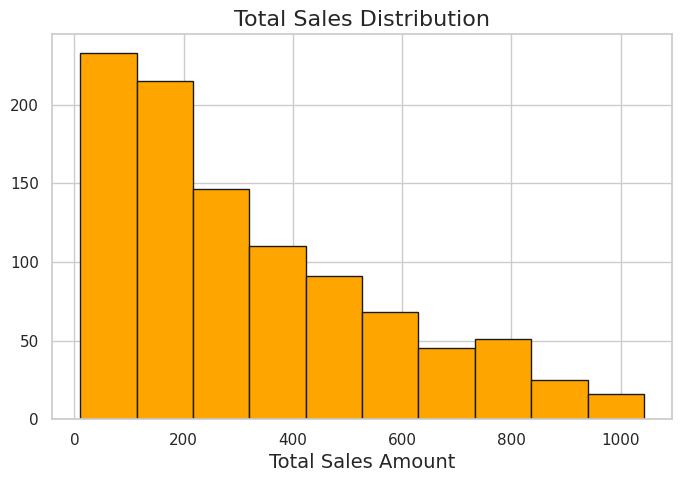

In [116]:
# Heirarchical Clustering

import scipy.cluster.hierarchy as sch

# Exploratory histograms for `Total` and `Quantity` columns
plt.figure(figsize=(8,5))
plt.title("Total Sales Distribution", fontsize=16)
plt.xlabel("Total Sales Amount", fontsize=14)
plt.grid(True)
plt.hist(data['Total'], color='orange', edgecolor='k')
plt.show()

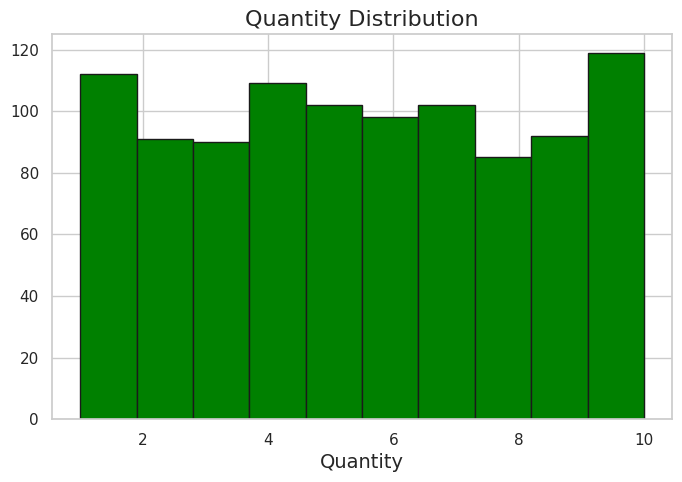

In [117]:
plt.figure(figsize=(8,5))
plt.title("Quantity Distribution", fontsize=16)
plt.xlabel("Quantity", fontsize=14)
plt.grid(True)
plt.hist(data['Quantity'], color='green', edgecolor='k')
plt.show()

In [118]:
# Prepare data for clustering - selecting 'Total' and 'Quantity' columns
X = data[['Total', 'Quantity']].values

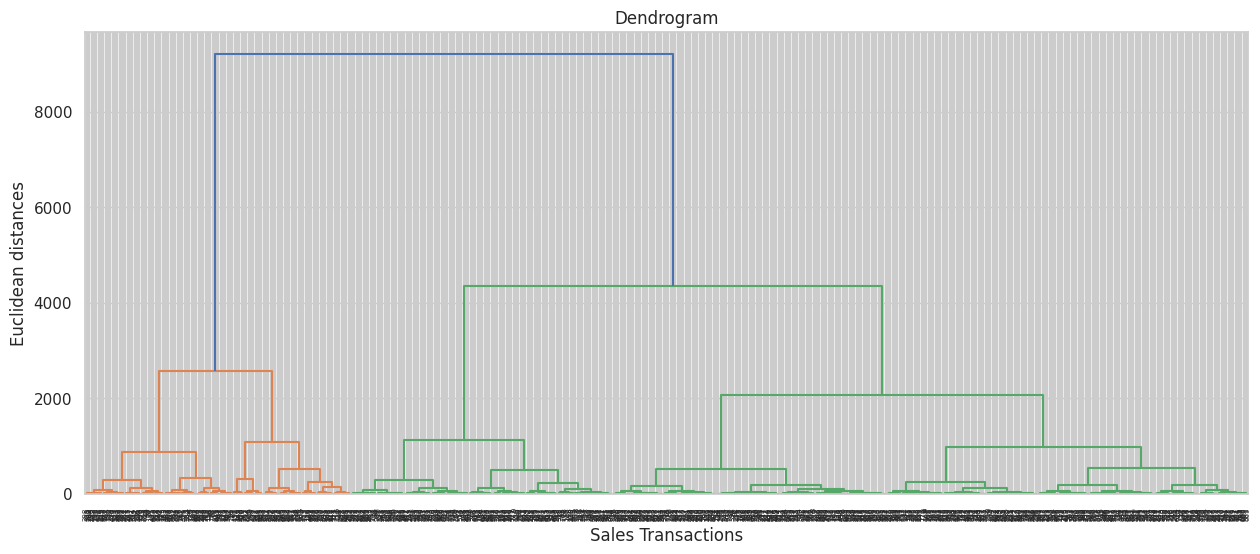

In [119]:
# Plot dendrogram to decide the optimal number of clusters
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Sales Transactions')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

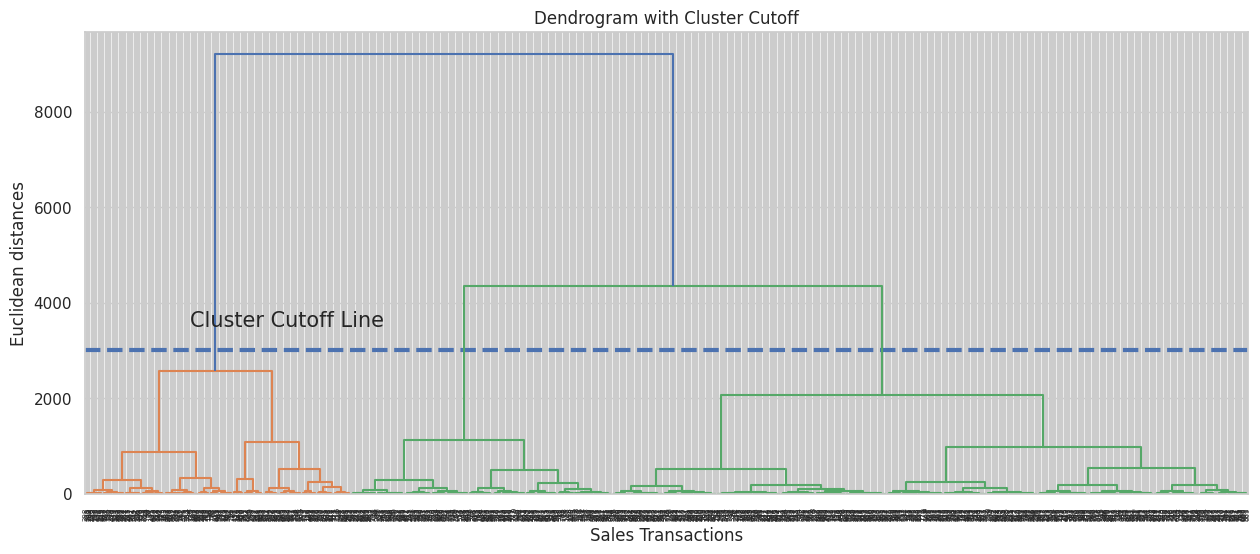

In [120]:
# Optional: Highlight a horizontal line to visualize cluster cutoff
threshold_value = 3000

plt.figure(figsize=(15,6))
plt.title('Dendrogram with Cluster Cutoff')
plt.xlabel('Sales Transactions')
plt.ylabel('Euclidean distances')
plt.hlines(y=threshold_value, xmin=0, xmax=10000, lw=3, linestyles='--')
plt.text(x=900, y=3500, s='Cluster Cutoff Line', fontsize=15)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters based on the dendrogram analysis
n_clusters = 4  # Adjust this based on the dendrogram analysis
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

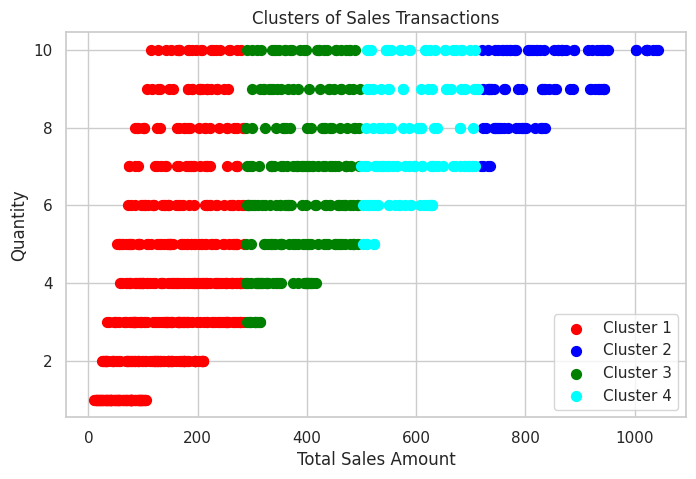

In [122]:
# Visualize clusters (scatter plot)
plt.figure(figsize=(8,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
# Add more clusters if needed
plt.title('Clusters of Sales Transactions')
plt.xlabel('Total Sales Amount')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [123]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA (exclude non-numeric columns if necessary)
X = data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results for easy visualization
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

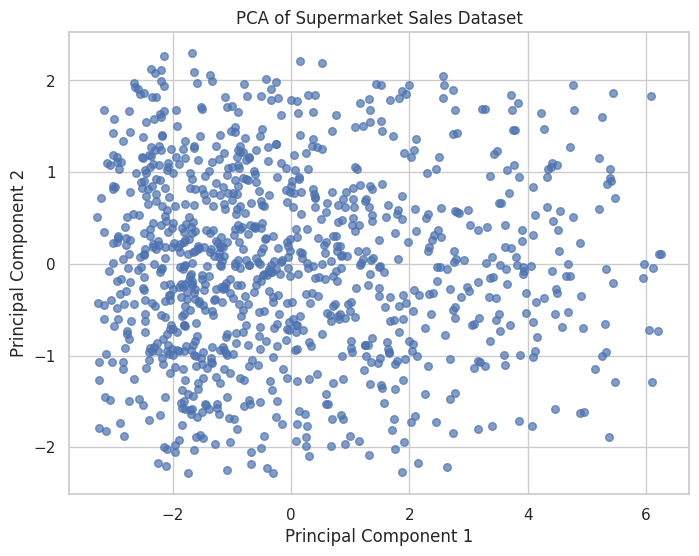

In [124]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], s=30, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Supermarket Sales Dataset')
plt.grid(True)
plt.show()

In [125]:
# Explained variance to see how much information is retained
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")

Explained variance by component: [0.61531292 0.13064264]


In [126]:
# Constructing a linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = data[['Quantity']]  # Independent variable (Feature)
y = data['Total']      # Dependent variable (Target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [127]:
#Model evaluation
#R^2 can be determined using our test dataset in the LinearRegression.score() method:
#check prediction score/accuracy
model.score(X_test, y_test)

0.49525776970533775

In [128]:
# Data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,92.7255,55.491526
1,118.9020,234.642090
2,263.9700,294.358945
3,597.6285,413.792654
4,60.8160,234.642090
5,279.1845,174.925236
6,57.1725,55.491526
7,731.4300,533.226364
8,325.3740,234.642090
9,507.6750,294.358945


<Axes: >

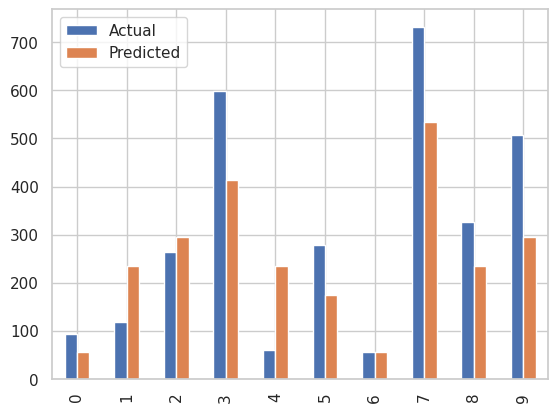

In [129]:
#The preceding screenshot shows the difference between the actual values and the predicted values. We can see them if we plot them:
evaluate.head(10).plot(kind = 'bar')

In [130]:
#Computing accuracy
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.49525776970533775
MAE score: 120.58488077101958
MSE score: 25917.91064711256
